<a href="https://colab.research.google.com/github/gabrielalastra/RedBull_youtubechannel/blob/main/RedBull_data_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path ='/content/drive/MyDrive/Colab Notebooks/video_data_clean.xlsx'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_excel(path)

In [4]:
df.head()

,id,defaultAudioLanguage,title,publishedAt,tags,tagsCount,commentCount,likeCount,viewCount,definition,duration,YearMonth,Year,reaction
0,xsPlB4WAmRc,en,timbersports training is wild 🪚 🪓,2022-02-09 17:15:40,None,1,16,1345,46110,hd,PT22S,2022,2022,1361
1,q-r6V_PgtcY,en,Huge Mountain Sends On Snowmobiles & Skis | Re...,2022-02-07 15:00:36,"['red bull', 'redbull', 'action sports', 'extr...",63,85,1935,60964,hd,PT6M56S,2022,2022,2020
2,jxe870HmYBE,en,Max Verstappen’s Icy Pre-Season Fun: Driving A...,2022-02-03 13:29:23,"['red bull', 'redbull', 'action sports', 'extr...",80,1071,26752,742990,hd,PT2M6S,2022,2022,27823
3,yxVOownOSRs,en,which runner are you? 🏃‍♀️,2022-02-01 17:09:05,None,1,62,1539,52319,hd,PT25S,2022,2022,1601
4,3-yglCSCPng,en,incredible skiing skills that just look ✨ casu...,2022-01-14 13:00:01,None,1,46,5895,238147,hd,PT22S,2022,2022,5941


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5723 non-null   object        
 1   defaultAudioLanguage  5723 non-null   object        
 2   title                 5723 non-null   object        
 3   publishedAt           5723 non-null   datetime64[ns]
 4   tags                  5723 non-null   object        
 5   tagsCount             5723 non-null   int64         
 6   commentCount          5723 non-null   int64         
 7   likeCount             5723 non-null   int64         
 8   viewCount             5723 non-null   int64         
 9   definition            5723 non-null   object        
 10  duration              5723 non-null   object        
 11  YearMonth             5723 non-null   int64         
 12  Year                  5723 non-null   int64         
 13  reaction          

In [6]:
df['title']= pd.Series(df['title'], dtype="string")
df['tags'] = pd.Series(df['tags'], dtype='string')

Text(0.5, 1.0, '\nNumerical Columns Corelation\n\n')

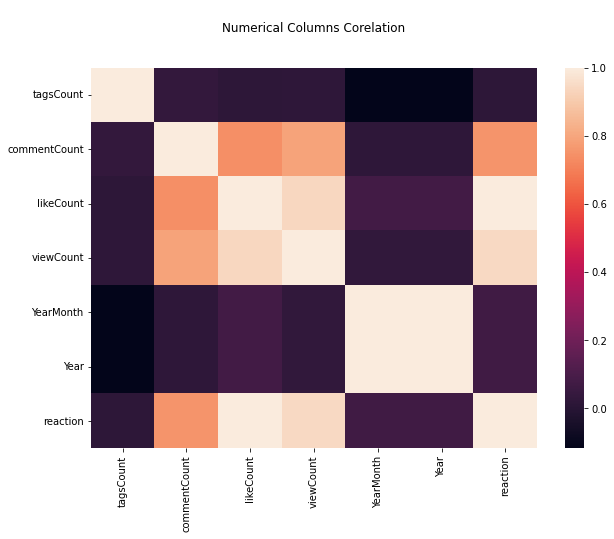

In [11]:
plt.figure(figsize=[10,7])
sns.heatmap(df.corr())
plt.title('\nNumerical Columns Corelation\n\n')

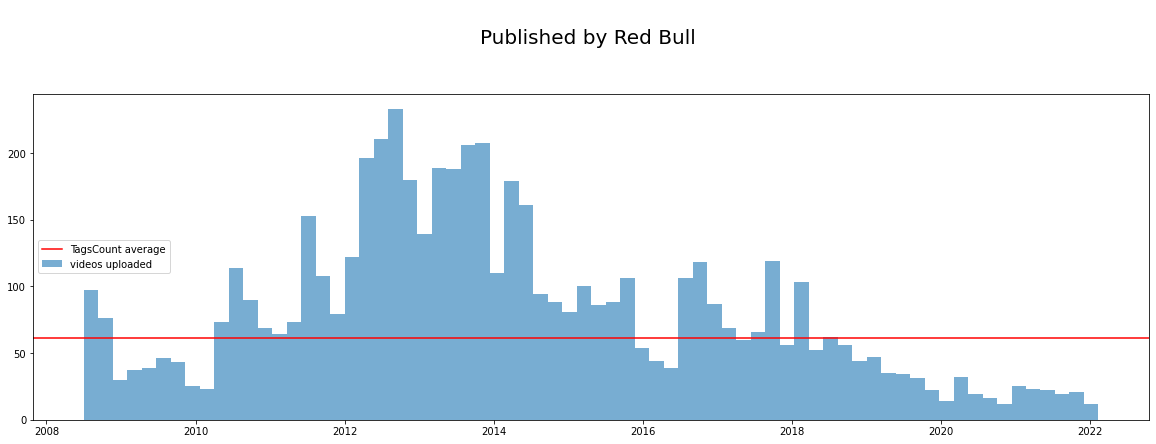

In [214]:
plt.figure(figsize=[20,6])
plt.hist(df['publishedAt'], bins=70, alpha=0.6, label='videos uploaded')
plt.axhline(df['tagsCount'].mean(), color='red', label='TagsCount average')
plt.title('\nPublished by Red Bull \n\n', size=20)
plt.legend(loc='center left')

Text(0.5, 1.0, '\nViews\n\n')

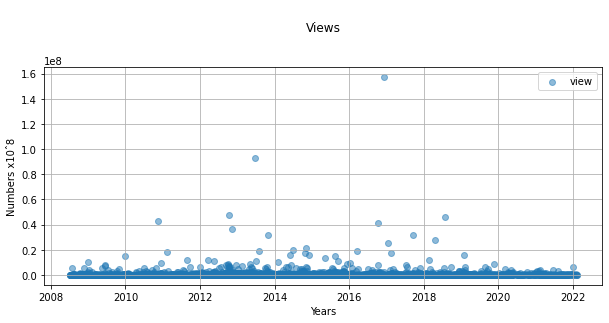

In [237]:
plt.figure(figsize=[10,4])
plt.scatter(df['publishedAt'],df['viewCount'], label='view', alpha=0.5)
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('Numbers x10ˆ8')
plt.xlabel('Years')
plt.title('\nViews\n\n')

<h2 align='right'>TAGS WORKED?</h2>
<hr color='orange'>

In [32]:
df['likeCount'].describe()

count    5.723000e+03
mean     3.275542e+03
std      2.485903e+04
min      0.000000e+00
25%      3.020000e+02
50%      7.280000e+02
75%      1.680000e+03
max      1.334567e+06
Name: likeCount, dtype: float64

<h3 align='right'>separate the TagsCount with LikesCount > 75%</h3>



In [53]:
tagmasky = (df['likeCount']>df['likeCount'].quantile(0.75))
tagmasky = df[tagmasky]
print('the lower number must to be the average\n',
      tagmasky['likeCount'].min())


the lower number must to be the average
 1681


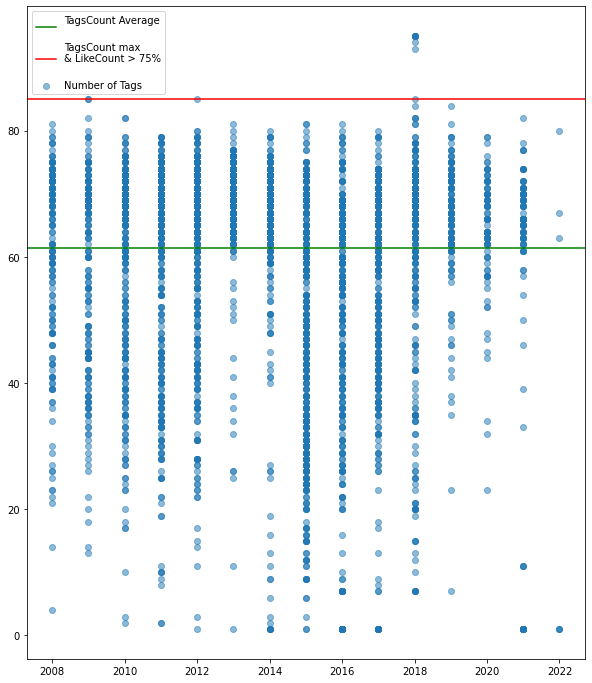

In [153]:
plt.figure(figsize=[10,12])
plt.scatter(df['Year'], df['tagsCount'], alpha=0.5, label='Number of Tags')
plt.axhline(df['tagsCount'].mean(), color='green', label='TagsCount Average\n')
plt.axhline(tagmasky['tagsCount'].max(), color='red', label='TagsCount max \n& LikeCount > 75%\n')
plt.legend(loc='upper left')

Text(0.5, 1.0, '\nLikeCount > 75%\n\n')

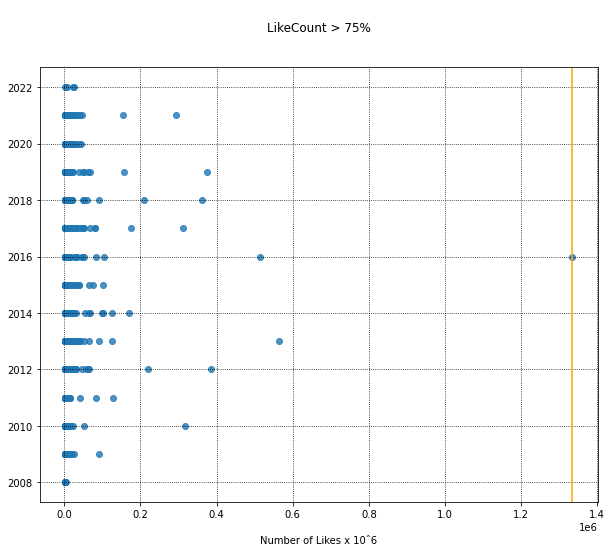

In [146]:
plt.figure(figsize=[10,8])
plt.scatter(tagmasky['likeCount'], tagmasky['Year'], alpha=0.8)
plt.axvline(tagmasky['likeCount'].max(), color='orange')
plt.grid(color='black', linestyle=':')
plt.xlabel('\nNumber of Likes x 10ˆ6')
plt.title('\nLikeCount > 75%\n\n')

In [143]:
outlier = (tagmasky['likeCount'] == tagmasky['likeCount'].max())
outlier = tagmasky[outlier]
print('\nInformation about the video most liked\n\n')
print('Title:\n',outlier['title'])
print('LikeCount:\n',outlier['likeCount'])
print('CommentCount:\n',outlier['commentCount'])
print('Published At:\n',outlier['publishedAt'])
print('Tags:\n', outlier['tags'].values)


Information about the video most liked


Title:
 1120    Last Call for Mr. Paul
Name: title, dtype: string
LikeCount:
 1120    1334567
Name: likeCount, dtype: int64
CommentCount:
 1120    21129
Name: commentCount, dtype: int64
Published At:
 1120   2016-12-07 09:00:00
Name: publishedAt, dtype: datetime64[ns]
Tags:
 <StringArray>
['[\'fixed perspective\', \'illusion\', \'magic\', \'trick\', \'tricks\', \'freerunning illusion\', \'freerunning\', \'free running\', \'parkour\', \'parkour freerunning\', \'jason paul\', \'freerunner\', \'Running\', \'red bull\', \'redbull\', \'red bull parkour\', \'action sports\', "Jason Paul\'s Freerunning Illuisions", \'freerunning illusions\', \'last call for mr paul\', \'last call for jason paul\', \'jason paul airport\', \'airport freerunning\', \'lufthansa\', \'airport parkour\', \'parkour pov\', \'parkour pov chase\', \'pov parkour\', \'late for flight parkour\', \'rooftop parkour\']']
Length: 1, dtype: string


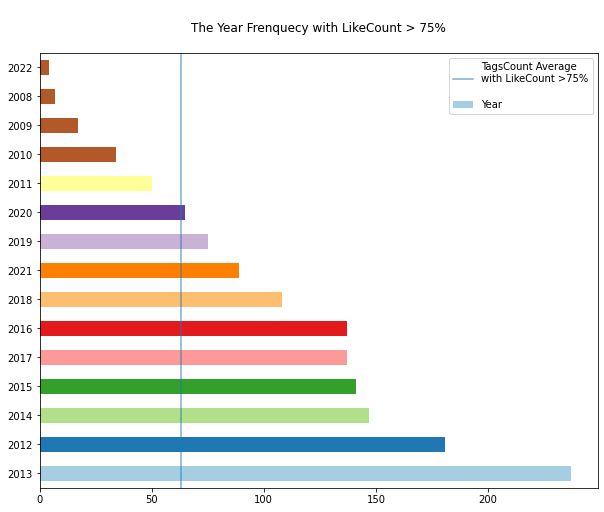

In [162]:
plt.figure(figsize=[10,8])
tagmasky['Year'].value_counts().plot(kind='barh', 
                                     color=plt.cm.Paired(np.arange(len(tagmasky['Year']))))
plt.axvline(tagmasky['tagsCount'].mean(),
            alpha=0.6,label='TagsCount Average\nwith LikeCount >75%\n')
plt.title('\nThe Year Frenquecy with LikeCount > 75%\n')
plt.legend(loc='upper right')

In [158]:
tagmasky['tagsCount'].describe()

count    1429.000000
mean       63.058782
std        14.268412
min         1.000000
25%        62.000000
50%        67.000000
75%        71.000000
max        85.000000
Name: tagsCount, dtype: float64

<h3 align='right'>the Data Frame with LikeCounts >75% <br>and without Tags</h3>


In [171]:
outlier = (tagmasky['tagsCount'] == tagmasky['tagsCount'].min())
outlier = tagmasky[outlier]
outlier.value_counts()

id           defaultAudioLanguage  title                                                                           publishedAt          tags  tagsCount  commentCount  likeCount  viewCount  definition  duration    YearMonth  Year  reaction
0PQ82O_kzCo  en                    Parachuting Onto A Moving Jet Ski                                               2021-10-04 16:02:27  None  1          34            3058       80676      hd          PT15S       2021       2021  3092        1
3-yglCSCPng  en                    incredible skiing skills that just look ✨ casual ✨                              2022-01-14 13:00:01  None  1          46            5895       238147     hd          PT22S       2022       2022  5941        1
vkUMUr7a2x8  en                    Red Bull Signature Series - The Mint 400 FULL TV EPISODE                        2014-09-26 21:20:03  None  1          348           13220      3359229    hd          PT52M1S     2014       2014  13568       1
vaJPwfOt7Bs  en              

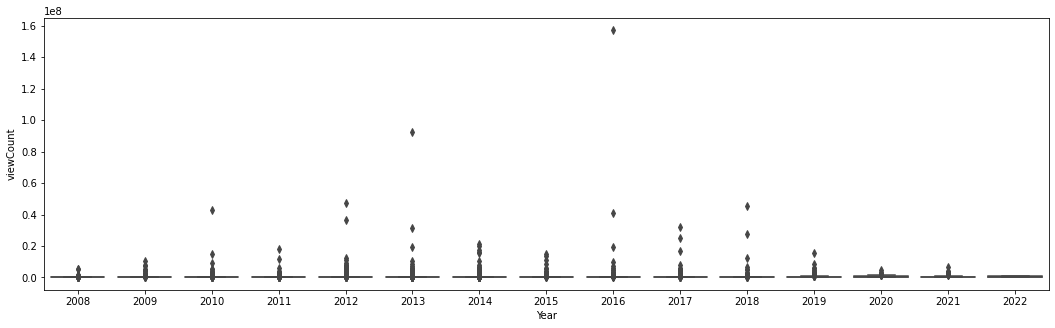

In [ ]:
plt.figure(figsize=[18,5])
sns.boxplot(x='Year', y='viewCount', data=df)

<h3 align='right'>Information about the most viewed video</h3>


In [184]:
mask = (df['viewCount'] == df['viewCount'].max())
mask = df[mask]
mask

,id,defaultAudioLanguage,title,publishedAt,tags,tagsCount,commentCount,likeCount,viewCount,definition,duration,YearMonth,Year,reaction
1120,Mv7J2CLBYBk,en,Last Call for Mr. Paul,2016-12-07 09:00:00,"['fixed perspective', 'illusion', 'magic', 'tr...",63,21129,1334567,157097735,hd,PT3M55S,2016,2016,1355696


In [ ]:
df['commentCount'].describe()

count     5723.000000
mean       140.707321
std        788.973772
min          0.000000
25%         23.000000
50%         43.000000
75%         94.000000
max      30412.000000
Name: commentCount, dtype: float64

Text(0.5, 1.0, '\nTagsCount in video with\nzero comment\n\n')

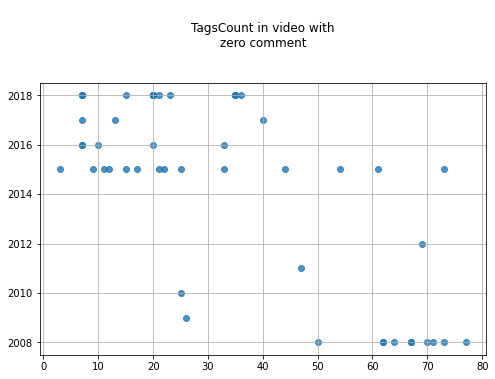

In [197]:
commentmask = (df['commentCount'] == df['commentCount'].min())
commentmask = df[commentmask]
plt.figure(figsize=[8,5])
plt.scatter(commentmask['tagsCount'], commentmask['Year'], alpha=0.8)
plt.grid()
plt.title('\nTagsCount in video with\nzero comment\n\n')

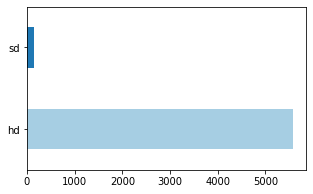

In [ ]:
df['definition'].value_counts().plot(kind='barh', figsize=[5,3],
                                             color=plt.cm.Paired(np.arange(len(df['definition']))))


In [ ]:
df['reaction'].describe()

count    5.723000e+03
mean     3.414169e+03
std      2.543208e+04
min      0.000000e+00
25%      3.375000e+02
50%      7.760000e+02
75%      1.771000e+03
max      1.355540e+06
Name: reaction, dtype: float64

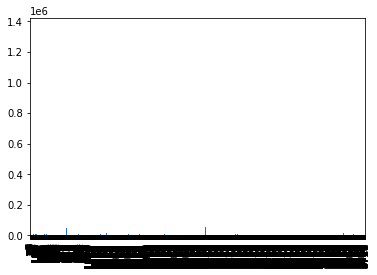

In [215]:
df['reaction'].plot.bar()